<a href="https://colab.research.google.com/github/DrewRust/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/U1_Build_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Yet.
## Impose Your will.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
url = 'Kentuck.csv'
Kentuck_df = pd.read_csv(url)
Kentuck_df.head()

,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
0,6167510,840,39,1,101,1966,1310,0,1,0,0,0,1,1
1,6167510,840,39,1,101,1966,2890,0,2,3,8,6,16,19
2,6167510,840,39,1,101,1966,3131,0,0,6,0,0,6,6
3,6167510,840,39,1,101,1966,3160,0,0,2,1,0,3,3
4,6167510,840,39,1,101,1966,3390,0,0,0,0,1,1,1


In [0]:
# COOPER'S HAWK
coop_bird_all_yrs = Kentuck_df[(Kentuck_df.AOU == 3330)]
# SORT BY year from 1966 to present
coop_sorted_df = coop_bird_all_yrs.sort_values(by='Year', ascending=True)

In [0]:
coop_sorted_df = coop_sorted_df.reset_index(drop=True)

In [0]:
coop_sorted_df.reset_index(level=0, inplace=True)

In [45]:
coop_sorted_df.tail()

,index,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
206,206,6365103,840,39,3,101,2017,3330,0,1,0,0,0,1,1
207,207,6363936,840,39,28,101,2017,3330,0,0,1,1,0,2,2
208,208,6364087,840,39,44,101,2017,3330,0,1,0,1,1,3,3
209,209,6364212,840,39,31,101,2017,3330,1,0,0,0,0,1,1
210,210,6366765,840,39,26,101,2017,3330,0,0,1,0,0,1,1


In [8]:
coop_sorted_df.isnull().sum()

RouteDataID     0
CountryNum      0
StateNum        0
Route           0
RPID            0
Year            0
AOU             0
Count10         0
Count20         0
Count30         0
Count40         0
Count50         0
StopTotal       0
SpeciesTotal    0
dtype: int64

In [39]:
coop_sorted_df.shape

(211, 15)

In [0]:
total_two_thou = coop_sorted_df.Year == 2000
total_two_thou_eigh = coop_sorted_df.Year == 2008
total_two_svteen = coop_sorted_df.Year == 2017

In [0]:
species_tot_two_thou = coop_sorted_df[total_two_thou]
species_tot_two_thou_eight = coop_sorted_df[total_two_thou_eigh]
species_tot_two_svn = coop_sorted_df[total_two_svteen]

In [42]:
print(species_tot_two_thou['SpeciesTotal'].sum(axis=0))
print(species_tot_two_thou_eight['SpeciesTotal'].sum(axis=0))
print(species_tot_two_svn['SpeciesTotal'].sum(axis=0))

9
13
8


In [43]:
len(coop_sorted_df)

211

In [14]:
# Just prints the last row don't use.
coop_sorted_df.iloc[210, : ]

RouteDataID     6366765
CountryNum          840
StateNum             39
Route                26
RPID                101
Year               2017
AOU                3330
Count10               0
Count20               0
Count30               1
Count40               0
Count50               0
StopTotal             1
SpeciesTotal          1
Name: 210, dtype: int64

In [44]:
# Creating an empty Dataframe with column names only
coop_df = pd.DataFrame(columns=['Year', 'Coopers_ID', 'Cooper_Hawk_Yr_Total'])
coop_df

,Year,Coopers_ID,Cooper_Hawk_Yr_Total


In [0]:
# The only way I could think of to print the last column was to equal it to RouteDataID: 6366765
x = 1966
tot = 0
for ind in coop_sorted_df.index: 
     if (coop_sorted_df['Year'][ind] == x):
       tot += (coop_sorted_df['SpeciesTotal'][ind])
       if coop_sorted_df['index'][ind] == 210:
         coop_df = coop_df.append({'Year': int(x), 'Coopers_ID': int(3330), 'Cooper_Hawk_Yr_Total': int(tot)}, ignore_index=True)
         break
     else:
       coop_df = coop_df.append({'Year': int(x), 'Coopers_ID': int(3330), 'Cooper_Hawk_Yr_Total': int(tot)}, ignore_index=True)
       x += 1
       tot = 0
       tot += (coop_sorted_df['SpeciesTotal'][ind])

In [47]:
coop_df.head()

,Year,Coopers_ID,Cooper_Hawk_Yr_Total
0,1966,3330,3
1,1967,3330,2
2,1968,3330,1
3,1969,3330,2
4,1970,3330,3


In [48]:
coop_df.dtypes

Year                    object
Coopers_ID              object
Cooper_Hawk_Yr_Total    object
dtype: object

In [0]:
coop_df['Year'] = coop_df['Year'].astype(str).astype(int)
coop_df['Coopers_ID'] = coop_df['Coopers_ID'].astype(str).astype(int)
coop_df['Cooper_Hawk_Yr_Total'] = coop_df['Cooper_Hawk_Yr_Total'].astype(str).astype(int)

In [50]:
coop_df.dtypes

Year                    int64
Coopers_ID              int64
Cooper_Hawk_Yr_Total    int64
dtype: object

In [51]:
# 9 for 2000, 13 for 2008, 8 for 2017
coop_df.tail(18)

,Year,Coopers_ID,Cooper_Hawk_Yr_Total
34,2000,3330,9
35,2001,3330,4
36,2002,3330,4
37,2003,3330,8
38,2004,3330,8
39,2005,3330,10
40,2006,3330,10
41,2007,3330,8
42,2008,3330,13
43,2009,3330,12


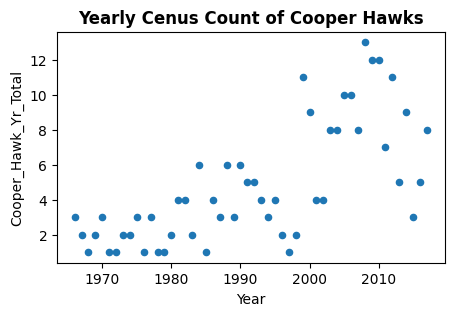

In [52]:
plt.style.use('default')
ax = coop_df.plot(kind='scatter', x='Year', y='Cooper_Hawk_Yr_Total', figsize=(5, 3))
ax.set_title("Yearly Cenus Count of Cooper Hawks", fontweight="bold");

In [0]:
# RED TAIL HAWK
redtail_bird_all_yrs = Kentuck_df[(Kentuck_df.AOU == 3370)]

In [0]:
# SORT BY year from 1966 to present
redtail_sorted_df = redtail_bird_all_yrs.sort_values(by='Year', ascending=True)

In [0]:
# Head
redtail_sorted_df = redtail_sorted_df.reset_index(drop=True)

In [0]:
redtail_sorted_df.reset_index(level=0, inplace=True)

In [57]:
redtail_sorted_df.tail()

,index,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
706,706,6365103,840,39,3,101,2017,3370,0,1,0,2,0,2,3
707,707,6367018,840,39,10,101,2017,3370,0,0,2,0,0,1,2
708,708,6364179,840,39,21,101,2017,3370,0,0,0,2,1,2,3
709,709,6364072,840,39,120,101,2017,3370,0,2,0,0,0,1,2
710,710,6363930,840,39,6,101,2017,3370,0,0,2,0,1,2,3


In [58]:
redtail_sorted_df.shape

(711, 15)

In [59]:
# Making sure it's only red tail
redtail_sorted_df['AOU'].value_counts().head()

3370    711
Name: AOU, dtype: int64

In [0]:
total_two_thou = redtail_sorted_df.Year == 2000
total_two_thou_eigh = redtail_sorted_df.Year == 2008
total_two_svteen = redtail_sorted_df.Year == 2017

In [0]:
species_tot_two_thou = redtail_sorted_df[total_two_thou]
species_tot_two_svn = redtail_sorted_df[total_two_svteen]
species_tot_two_thou_eight = redtail_sorted_df[total_two_thou_eigh]

In [62]:
print(species_tot_two_thou['SpeciesTotal'].sum(axis=0))
print(species_tot_two_thou_eight['SpeciesTotal'].sum(axis=0))
print(species_tot_two_svn['SpeciesTotal'].sum(axis=0))

37
28
56


In [63]:
# Creating an empty Dataframe with column names only
redtail_df = pd.DataFrame(columns=['Year', 'Redtail_ID', 'Red_Tail_Yr_Total'])
redtail_df

,Year,Redtail_ID,Red_Tail_Yr_Total


In [0]:
# This was the last row route ID otherwise it would skip over the last else statement and not append the last row of 2017 data: 6363930
x = 1966
tot = 0
for ind in redtail_sorted_df.index: 
     if (redtail_sorted_df['Year'][ind] == x):
       tot += (redtail_sorted_df['SpeciesTotal'][ind])
       if redtail_sorted_df['index'][ind] == 710:
         redtail_df = redtail_df.append({'Year': int(x), 'Redtail_ID': int(3330), 'Red_Tail_Yr_Total': int(tot)}, ignore_index=True)
         break
     else:
       redtail_df = redtail_df.append({'Year': int(x), 'Redtail_ID': int(3330), 'Red_Tail_Yr_Total': int(tot)}, ignore_index=True)
       x += 1
       tot = 0
       tot += (redtail_sorted_df['SpeciesTotal'][ind])

In [66]:
redtail_df.head()

,Year,Redtail_ID,Red_Tail_Yr_Total
0,1966,3330,5
1,1967,3330,9
2,1968,3330,11
3,1969,3330,7
4,1970,3330,8


In [67]:
# 37 for 2000, 28 for 2008, and 56 for 2017
redtail_df.tail(18)

,Year,Redtail_ID,Red_Tail_Yr_Total
34,2000,3330,37
35,2001,3330,50
36,2002,3330,29
37,2003,3330,26
38,2004,3330,17
39,2005,3330,31
40,2006,3330,34
41,2007,3330,46
42,2008,3330,28
43,2009,3330,31


In [0]:
redtail_df['Year'] = redtail_df['Year'].astype(str).astype(int)
redtail_df['Redtail_ID'] = redtail_df['Redtail_ID'].astype(str).astype(int)
redtail_df['Red_Tail_Yr_Total'] = redtail_df['Red_Tail_Yr_Total'].astype(str).astype(int)

In [69]:
redtail_df.dtypes

Year                 int64
Redtail_ID           int64
Red_Tail_Yr_Total    int64
dtype: object

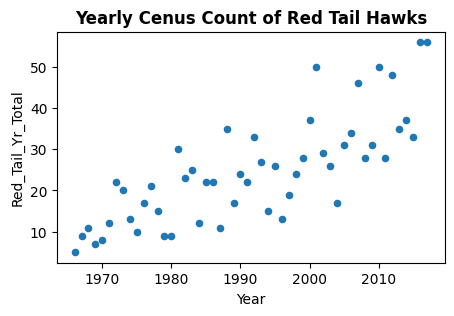

In [70]:
plt.style.use('default')
ax = redtail_df.plot(kind='scatter', x='Year', y='Red_Tail_Yr_Total', figsize=(5,3))
ax.set_title("Yearly Cenus Count of Red Tail Hawks", fontweight="bold");

In [0]:
# RED SHOULDERED HAWK
redshoulder_bird_all_yrs = Kentuck_df[(Kentuck_df.AOU == 3390)]

In [0]:
# SORT BY year from 1966 to present
redshoulder_sorted_df = redshoulder_bird_all_yrs.sort_values(by='Year', ascending=True)

In [0]:
# Head
redshoulder_sorted_df = redshoulder_sorted_df.reset_index(drop=True)

In [0]:
redshoulder_sorted_df.reset_index(level=0, inplace=True)

In [81]:
redshoulder_sorted_df.tail()

,index,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
382,382,6364505,840,39,107,101,2017,3390,0,1,1,0,0,2,2
383,383,6363868,840,39,2,101,2017,3390,0,0,1,0,0,1,1
384,384,6364276,840,39,36,101,2017,3390,0,2,2,0,0,3,4
385,385,6367027,840,39,112,101,2017,3390,1,0,0,0,0,1,1
386,386,6365103,840,39,3,101,2017,3390,1,2,2,0,1,6,6


In [76]:
redshoulder_sorted_df.shape

(387, 15)

In [0]:
total_two_thou = redshoulder_sorted_df.Year == 2000
total_two_thou_eigh = redshoulder_sorted_df.Year == 2008
total_two_svteen = redshoulder_sorted_df.Year == 2017

In [0]:
species_tot_two_thou = redshoulder_sorted_df[total_two_thou]
species_tot_two_thou_eight = redshoulder_sorted_df[total_two_thou_eigh]
species_tot_two_svn = redshoulder_sorted_df[total_two_svteen]

In [79]:
print(species_tot_two_thou['SpeciesTotal'].sum(axis=0))
print(species_tot_two_thou_eight['SpeciesTotal'].sum(axis=0))
print(species_tot_two_svn['SpeciesTotal'].sum(axis=0))

15
27
46


In [80]:
# Creating an empty Dataframe with column names only
redshoulder_df = pd.DataFrame(columns=['Year', 'Redshoulder_ID', 'Red_Shoulder_Yr_Total'])
redshoulder_df

,Year,Redshoulder_ID,Red_Shoulder_Yr_Total


In [0]:
# Last row should hit the if statement to append: 6365103
x = 1966
tot = 0
for ind in redshoulder_sorted_df.index: 
     if (redshoulder_sorted_df['Year'][ind] == x):
       tot += (redshoulder_sorted_df['SpeciesTotal'][ind])
       if redshoulder_sorted_df['index'][ind] == 386:
         redshoulder_df = redshoulder_df.append({'Year': int(x), 'Redshoulder_ID': int(3390), 'Red_Shoulder_Yr_Total': int(tot)}, ignore_index=True)
         break
     else:
       redshoulder_df = redshoulder_df.append({'Year': int(x), 'Redshoulder_ID': int(3390), 'Red_Shoulder_Yr_Total': int(tot)}, ignore_index=True)
       x += 1
       tot = 0
       tot += (redshoulder_sorted_df['SpeciesTotal'][ind])

In [83]:
redshoulder_df.head()

,Year,Redshoulder_ID,Red_Shoulder_Yr_Total
0,1966,3390,7
1,1967,3390,8
2,1968,3390,6
3,1969,3390,4
4,1970,3390,8


In [84]:
# 15 for 2000, 27 for 2008, 46 for 2017
redshoulder_df.tail(18)

,Year,Redshoulder_ID,Red_Shoulder_Yr_Total
34,2000,3390,15
35,2001,3390,18
36,2002,3390,15
37,2003,3390,13
38,2004,3390,18
39,2005,3390,22
40,2006,3390,33
41,2007,3390,25
42,2008,3390,27
43,2009,3390,41


In [0]:
redshoulder_df['Year'] = redshoulder_df['Year'].astype(str).astype(int)
redshoulder_df['Redshoulder_ID'] = redshoulder_df['Redshoulder_ID'].astype(str).astype(int)
redshoulder_df['Red_Shoulder_Yr_Total'] = redshoulder_df['Red_Shoulder_Yr_Total'].astype(str).astype(int)

In [86]:
redshoulder_df.dtypes

Year                     int64
Redshoulder_ID           int64
Red_Shoulder_Yr_Total    int64
dtype: object

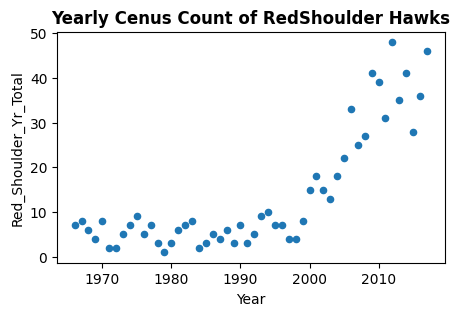

In [87]:
plt.style.use('default')
ax = redshoulder_df.plot(kind='scatter', x='Year', y='Red_Shoulder_Yr_Total', figsize=(5,3))
ax.set_title("Yearly Cenus Count of RedShoulder Hawks", fontweight="bold");

In [88]:
resulting_df = pd.merge(redtail_df, redshoulder_df, on = ['Year'], how = 'inner')
resulting_df.head()

,Year,Redtail_ID,Red_Tail_Yr_Total,Redshoulder_ID,Red_Shoulder_Yr_Total
0,1966,3330,5,3390,7
1,1967,3330,9,3390,8
2,1968,3330,11,3390,6
3,1969,3330,7,3390,4
4,1970,3330,8,3390,8


In [115]:
finished_df = pd.merge(resulting_df, coop_df, on = ['Year'], how = 'inner')
finished_df

,Year,Redtail_ID,Red_Tail_Yr_Total,Redshoulder_ID,Red_Shoulder_Yr_Total,Coopers_ID,Cooper_Hawk_Yr_Total
0,1966,3330,5,3390,7,3330,3
1,1967,3330,9,3390,8,3330,2
2,1968,3330,11,3390,6,3330,1
3,1969,3330,7,3390,4,3330,2
4,1970,3330,8,3390,8,3330,3
5,1971,3330,12,3390,2,3330,1
6,1972,3330,22,3390,2,3330,1
7,1973,3330,20,3390,5,3330,2
8,1974,3330,13,3390,7,3330,2
9,1975,3330,10,3390,9,3330,3


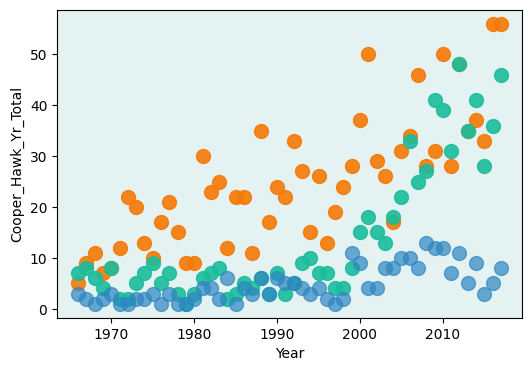

In [90]:
plt.style.use('default')
ax = plt.gca()

finished_df.plot(kind='scatter',x='Year',y='Red_Tail_Yr_Total', c = '#f57905', s = 100, alpha = 0.9, figsize=(6,4), ax=ax)
finished_df.plot(kind='scatter',x='Year',y='Red_Shoulder_Yr_Total', c = '#1ABC9C', s = 100, alpha = 0.9, figsize=(6,4), ax=ax)
finished_df.plot(kind='scatter',x='Year',y='Cooper_Hawk_Yr_Total', c = '#2E86C1', s = 100, alpha = 0.7, figsize=(6,4), ax=ax)
ax.set_facecolor("#e4f2f2")

plt.show()


In [91]:
finished_df.head(2)

,Year,Redtail_ID,Red_Tail_Yr_Total,Redshoulder_ID,Red_Shoulder_Yr_Total,Coopers_ID,Cooper_Hawk_Yr_Total
0,1966,3330,5,3390,7,3330,3
1,1967,3330,9,3390,8,3330,2


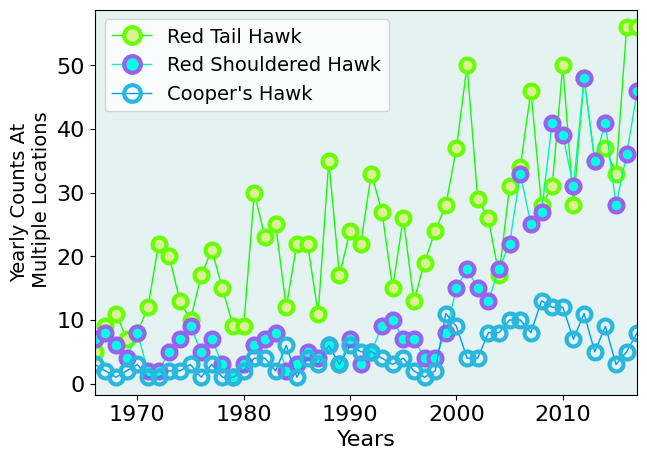

In [92]:
plt.style.use('default')
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(7,5))
finished_df.plot(x='Year', y='Red_Tail_Yr_Total', color="#11ff00", lw=1, ls='-', marker='o', markersize=10, 
        markerfacecolor="#dbf294", markeredgewidth=3, markeredgecolor="#68ff03", ax = ax)
finished_df.plot(x='Year', y='Red_Shoulder_Yr_Total', color="#00f7b1", lw=1, ls='-', marker='o', markersize=10, 
        markerfacecolor="#00ffe5", markeredgewidth=3, markeredgecolor="#9961ed", ax = ax)
finished_df.plot(x='Year', y='Cooper_Hawk_Yr_Total', color="#009cf0", lw=1, ls='-', marker='o', markersize=10, 
        markerfacecolor="none", markeredgewidth=3, markeredgecolor="#2ab7de", ax = ax)
ax.set_facecolor("#e4f2f2")

legend_elements = [Line2D([0], [0], color="#11ff00", lw=1, ls='-', marker='o', markersize=12, 
        markerfacecolor="#dbf294", markeredgewidth=3, markeredgecolor="#68ff03", label='Red Tail Hawk'),
                   Line2D([0], [0], color="#00f7b1", lw=1, ls='-', marker='o', markersize=12, 
        markerfacecolor="#00ffe5", markeredgewidth=3, markeredgecolor="#9961ed", label='Red Shouldered Hawk'),
                  Line2D([0], [0], color="#009cf0", lw=1, ls='-', marker='o', markersize=12, 
        markerfacecolor="none", markeredgewidth=3, markeredgecolor="#2ab7de", label="Cooper's Hawk")]

ax.legend(handles=legend_elements, fontsize = 14)
# Set the x and y axes labels
ax.set_xlabel("Years", fontsize=16)
ax.set_ylabel("Yearly Counts At\n Multiple Locations", fontsize=14)
plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=16)
plt.show()

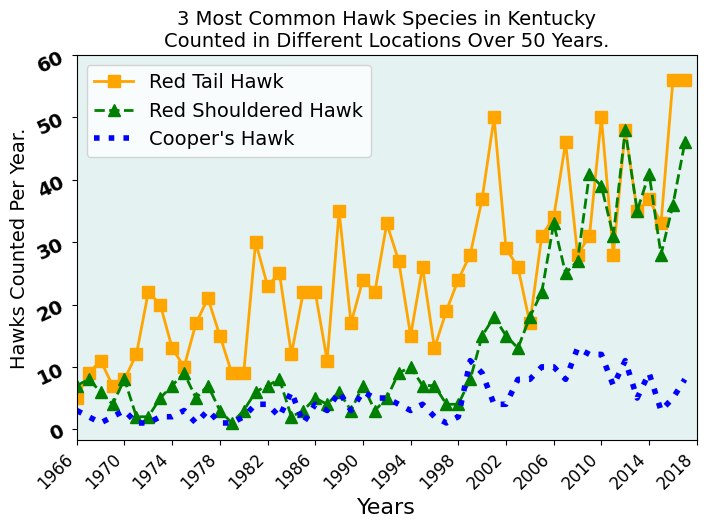

In [117]:
plt.style.use('default')
fig, ax = plt.subplots(figsize = [8,5])
finished_df.plot(x='Year', y='Red_Tail_Yr_Total', color = 'orange', marker ='s', markersize= 8, lw = 2, markerfacecolor= 'orange', markeredgecolor='orange', ax = ax)
finished_df.plot(x='Year', y='Red_Shoulder_Yr_Total', color = 'green', marker ='^', markersize = 8, lw = 2, ls = '--', markerfacecolor= 'green', markeredgecolor= 'g', ax = ax)
finished_df.plot(x='Year', y='Cooper_Hawk_Yr_Total', lw = 4, ls =':', color = 'blue', ax = ax)
ax.set_facecolor("#e4f2f2")


L=plt.legend(fontsize = 14)
L.get_texts()[0].set_text('Red Tail Hawk')
L.get_texts()[1].set_text('Red Shouldered Hawk')
L.get_texts()[2].set_text("Cooper's Hawk")

# Set the x and y axes labels
ax.set_xticks(range(1966, 2020, 4))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='12'  
)

ax.set_yticks(range(0, 65, 10))
plt.yticks(
    rotation=25, 
    horizontalalignment='right',
    fontweight='bold',
    fontsize='14'  
)


# Add title and axis names
plt.title('3 Most Common Hawk Species in Kentucky\nCounted in Different Locations Over 50 Years.', fontsize = 14)
plt.xlabel('Years', fontsize = 16)
plt.ylabel("Hawks Counted Per Year.", fontsize = 14)

plt.show()